# Iris Data Plot Notebook

このノートブックでは、アヤメ (Iris) データセットの基本的な情報確認と、選択した特徴量を用いた散布図の作成を行います。


In [4]:
import itertools
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")


## データ読み込みと整形


In [5]:
def find_data_path(filename: str = "iris.csv", search_depth: int = 4) -> Path:
    """Look for the dataset in the current directory and up to N parent directories."""
    current = Path.cwd().resolve()
    candidates = [current / filename]
    candidates.extend(parent / filename for parent in current.parents[:search_depth])

    for path in candidates:
        if path.exists():
            return path

    raise FileNotFoundError(
        f"Could not find {filename}. Checked: {[str(path) for path in candidates]}"
    )


def load_iris_dataframe() -> pd.DataFrame:
    path = find_data_path()
    df = pd.read_csv(path)
    renamed_columns = {
        "sepal.length (cm)": "sepal.length",
        "sepal.width (cm)": "sepal.width",
        "petal.length (cm)": "petal.length",
        "petal.width (cm)": "petal.width",
    }
    df = df.rename(columns=renamed_columns)
    species_map = {0: "setosa", 1: "versicolor", 2: "virginica"}
    df["species"] = df["target"].map(species_map)
    return df


df_iris = load_iris_dataframe()
df_iris.head()


,sepal.length,sepal.width,petal.length,petal.width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 基本統計量とクラス分布


In [6]:
summary = df_iris.describe(include=[np.number]).T
summary[["mean", "std", "min", "max"]]


,mean,std,min,max
sepal.length,5.843333,0.828066,4.3,7.9
sepal.width,3.057333,0.435866,2.0,4.4
petal.length,3.758000,1.765298,1.0,6.9
petal.width,1.199333,0.762238,0.1,2.5
target,1.000000,0.819232,0.0,2.0


In [7]:
class_counts = df_iris["species"].value_counts().rename("count")
class_counts


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## 散布図用のユーティリティ関数


In [8]:
def make_color_palette(labels, palette: str | list[str] | None = None) -> dict[str, str]:
    unique_labels = sorted(set(labels))
    if palette is None:
        colors = sns.color_palette("deep", n_colors=len(unique_labels))
    elif isinstance(palette, str):
        colors = sns.color_palette(palette, n_colors=len(unique_labels))
    else:
        if len(palette) < len(unique_labels):
            raise ValueError("Palette list is shorter than the number of unique labels.")
        colors = palette
    return dict(zip(unique_labels, colors))


def plot_iris_scatter(
    data: pd.DataFrame,
    feature_x: str,
    feature_y: str,
    palette: str | list[str] | None = None,
    marker_styles: dict[str, str] | None = None,
    point_size: int = 60,
    alpha: float = 0.85,
    title: str | None = None,
):
    required_columns = {feature_x, feature_y, "species"}
    missing = required_columns - set(data.columns)
    if missing:
        raise ValueError(f"Dataframe is missing required columns: {missing}")

    markers_default = {
        "setosa": "o",
        "versicolor": "s",
        "virginica": "^",
    }
    markers = markers_default if marker_styles is None else marker_styles

    color_map = make_color_palette(data["species"], palette)
    species_list = sorted(data["species"].unique())

    fig, ax = plt.subplots(figsize=(8, 6))

    for species in species_list:
        subset = data[data["species"] == species]
        marker = markers.get(species, "o")
        ax.scatter(
            subset[feature_x],
            subset[feature_y],
            label=species,
            s=point_size,
            marker=marker,
            color=color_map[species],
            edgecolor="black",
            alpha=alpha,
        )

    xlabel = feature_x.replace(".", " ")
    ylabel = feature_y.replace(".", " ")
    ax.set_xlabel(xlabel.title())
    ax.set_ylabel(ylabel.title())
    ax.set_title(title or f"Iris scatter: {feature_x} vs {feature_y}")
    ax.legend(title="Species", frameon=True)
    plt.tight_layout()
    return ax


## デフォルト設定での散布図


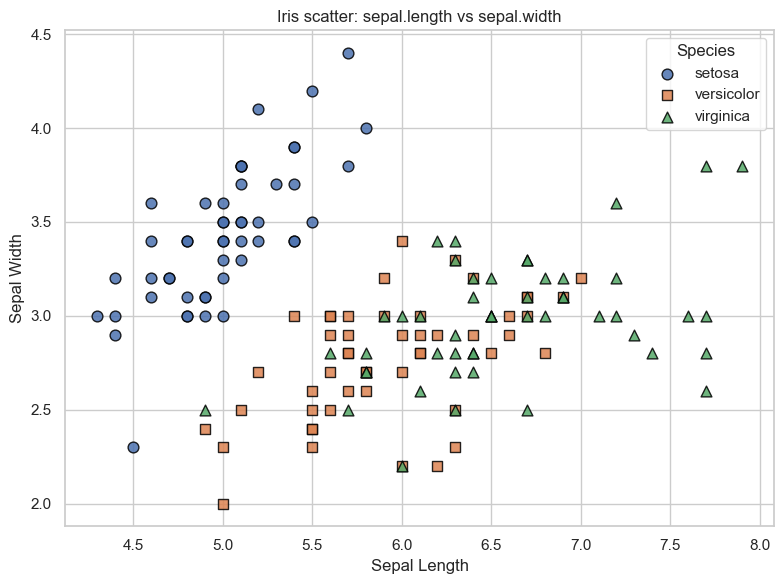

In [9]:
plot_iris_scatter(
    data=df_iris,
    feature_x="sepal.length",
    feature_y="sepal.width",
)
plt.show()


## カラーパレットとマーカーを変更した散布図


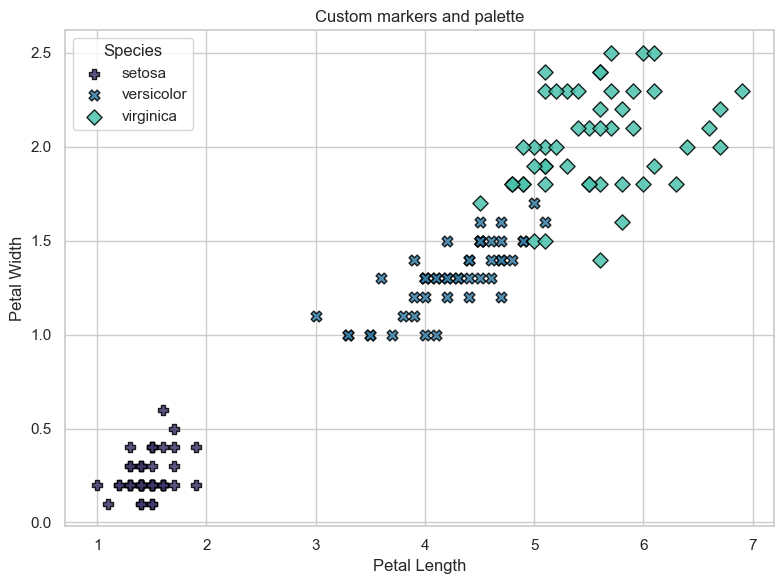

In [10]:
custom_markers = {"setosa": "P", "versicolor": "X", "virginica": "D"}
plot_iris_scatter(
    data=df_iris,
    feature_x="petal.length",
    feature_y="petal.width",
    palette="mako",
    marker_styles=custom_markers,
    title="Custom markers and palette",
)
plt.show()
